In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('src/forex.csv')

In [3]:
df = df.set_index('date')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1453035 entries, 2001-04-10 to 2021-08-30
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   slug      1453035 non-null  object 
 1   open      1453035 non-null  float64
 2   high      1453035 non-null  float64
 3   low       1453035 non-null  float64
 4   close     1453035 non-null  float64
 5   currency  1453035 non-null  object 
dtypes: float64(4), object(2)
memory usage: 77.6+ MB


In [10]:
df

,slug,open,high,low,close,currency
date,,,,,,
2001-04-10,GBP/EGP,5.580900,5.594700,5.594700,5.594700,EGP
2001-06-04,GBP/EGP,5.475170,5.493900,5.493900,5.493900,EGP
2001-08-01,GBP/EGP,5.679900,5.654300,5.654300,5.654300,EGP
2002-07-29,GBP/EGP,7.217000,7.217000,7.217000,7.217000,EGP
2003-01-02,GBP/EGP,7.424290,7.389900,7.389900,7.389900,EGP
...,...,...,...,...,...,...
2021-08-24,USD/MXN,20.317129,20.360830,20.238400,20.317949,MXN
2021-08-25,USD/MXN,20.202400,20.347589,20.160601,20.206100,MXN
2021-08-26,USD/MXN,20.228861,20.384501,20.211901,20.216101,MXN


In [9]:
df.index = pd.to_datetime(df.index)

In [11]:
df_GBP2EGP = df[df.slug == 'GBP/EGP'].copy()

In [12]:
df_GBP2EGP = df_GBP2EGP.sort_index()

In [13]:
df_GBP2EGP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4536 entries, 2001-04-10 to 2021-08-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   slug      4536 non-null   object 
 1   open      4536 non-null   float64
 2   high      4536 non-null   float64
 3   low       4536 non-null   float64
 4   close     4536 non-null   float64
 5   currency  4536 non-null   object 
dtypes: float64(4), object(2)
memory usage: 248.1+ KB


In [14]:
# удаляем данные за 2001-2003 года, т к их совсем мало
df_GBP2EGP = df_GBP2EGP[~df_GBP2EGP.index.year.isin([2001, 2002, 2003])]

In [57]:
df_GBP2EGP.head(20)

,slug,open,high,low,close,currency
date,,,,,,
2004-02-13,GBP/EGP,11.607,11.6420,11.5200,11.578,EGP
2004-02-16,GBP/EGP,11.571,11.6230,11.4990,11.607,EGP
2004-02-17,GBP/EGP,11.608,11.7390,11.5210,11.662,EGP
2004-02-18,GBP/EGP,11.677,11.7720,11.6310,11.691,EGP
2004-02-19,GBP/EGP,11.691,11.7050,11.5220,11.603,EGP
2004-02-20,GBP/EGP,11.603,11.6440,11.3878,11.463,EGP
2004-02-23,GBP/EGP,11.469,11.5140,11.3185,11.503,EGP
2004-02-24,GBP/EGP,11.502,11.6382,11.3890,11.611,EGP
2004-02-25,GBP/EGP,11.612,11.6481,11.4961,11.520,EGP


In [15]:
df_GBP2EGP_filled = df_GBP2EGP.resample('D').ffill()

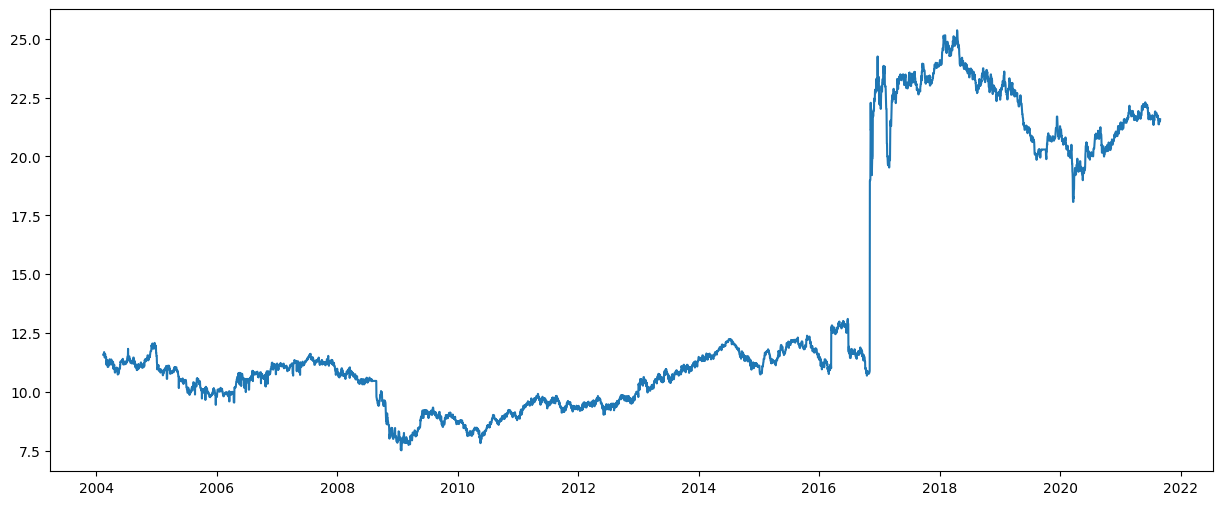

In [69]:
plt.figure(figsize=(15, 6))

plt.plot(df_GBP2EGP_filled.index, df_GBP2EGP_filled.close)

Text(0.5, 1.0, 'Скользящие статистики')

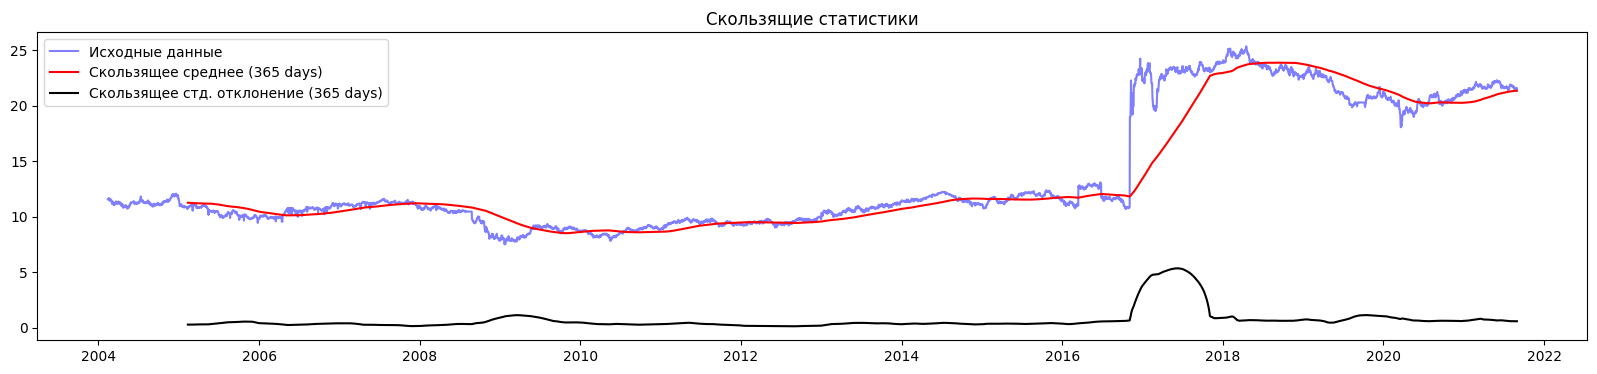

In [77]:
roll_mean = df_GBP2EGP_filled.close.rolling(window=365).mean()
roll_std = df_GBP2EGP_filled.close.rolling(window=365).std()

plt.figure(figsize=(20, 4))
plt.plot(df_GBP2EGP_filled.close, color='blue', label='Исходные данные', alpha=0.5)
plt.plot(roll_mean, color='red', label='Скользящее среднее (365 days)')
plt.plot(roll_std, color='black', label='Скользящее стд. отклонение (365 days)')
plt.legend(loc='best')
plt.title('Скользящие статистики')

In [16]:
from statsmodels.tsa.stattools import adfuller

In [74]:
test_df_GBP2EGP  =adfuller(df_GBP2EGP_filled.close)
test_df_GBP2EGP[1], test_df_GBP2EGP[0]

(0.844524501671398, -0.7085421580205985)

In [17]:
df_GBP2EGP_filled['log_close'] = np.log(df_GBP2EGP_filled.close + 1e-6)

In [94]:
test_df_GBP2EGP_log  =adfuller(df_GBP2EGP_filled.log_close)
test_df_GBP2EGP_log[1], test_df_GBP2EGP_log[0]

(0.8452637039681846, -0.705714851458389)

Text(0.5, 1.0, 'Скользящие статистики (log)')

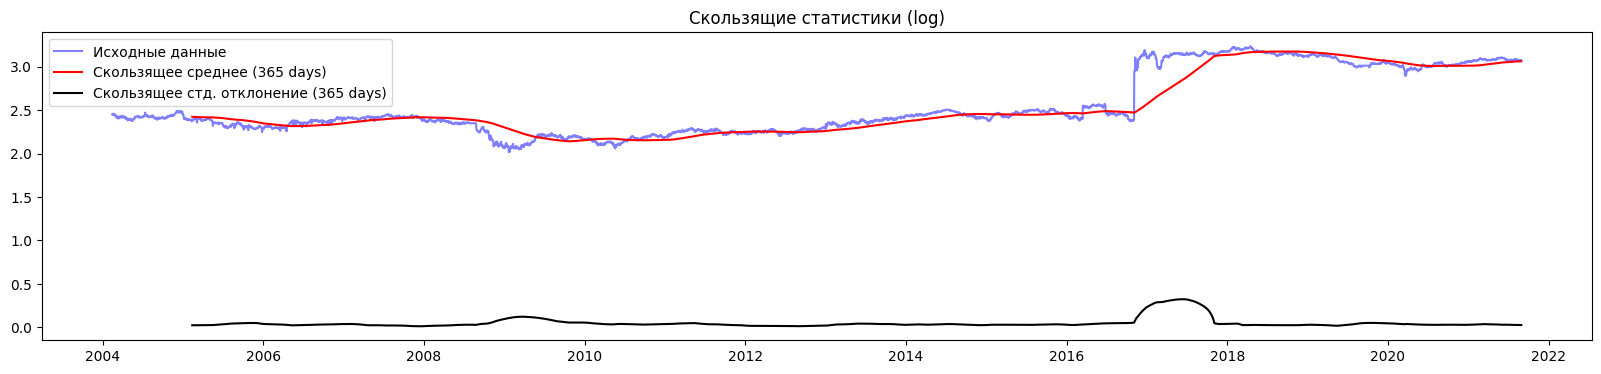

In [84]:
roll_mean = df_GBP2EGP_filled.log_close.rolling(window=365).mean()
roll_std = df_GBP2EGP_filled.log_close.rolling(window=365).std()

plt.figure(figsize=(20, 4))
plt.plot(df_GBP2EGP_filled.log_close, color='blue', label='Исходные данные', alpha=0.5)
plt.plot(roll_mean, color='red', label='Скользящее среднее (365 days)')
plt.plot(roll_std, color='black', label='Скользящее стд. отклонение (365 days)')
plt.legend(loc='best')
plt.title('Скользящие статистики (log)')

In [18]:
df_GBP2EGP_filled['diff_log_close'] = df_GBP2EGP_filled['log_close'].diff(365)

df_GBP2EGP_filled_cl = df_GBP2EGP_filled.dropna()

Text(0.5, 1.0, 'Скользящие статистики (diff)')

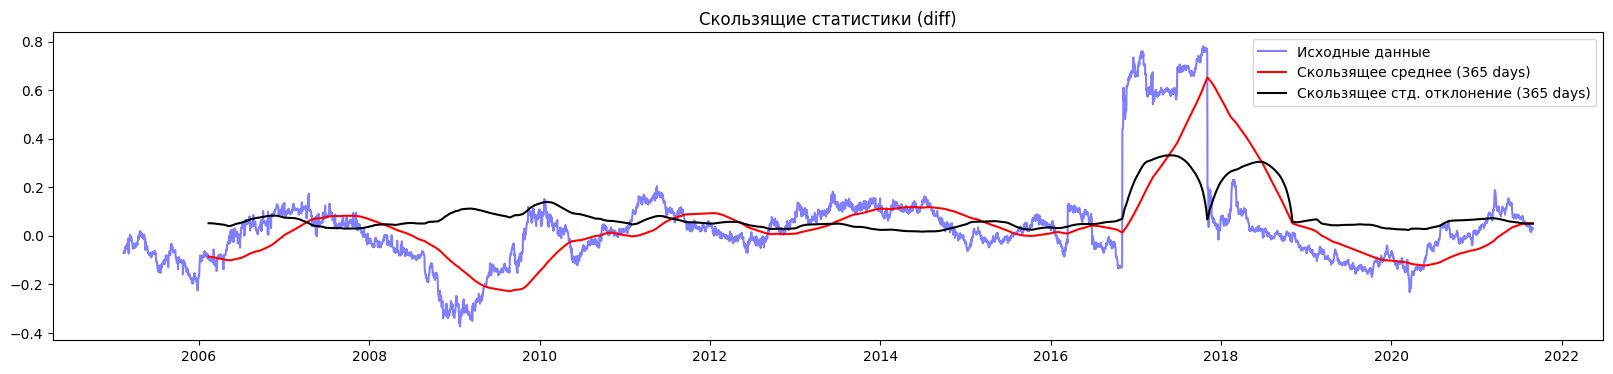

In [91]:
roll_mean = df_GBP2EGP_filled.diff_log_close.rolling(window=365).mean()
roll_std = df_GBP2EGP_filled.diff_log_close.rolling(window=365).std()

plt.figure(figsize=(20, 4))
plt.plot(df_GBP2EGP_filled.diff_log_close, color='blue', label='Исходные данные', alpha=0.5)
plt.plot(roll_mean, color='red', label='Скользящее среднее (365 days)')
plt.plot(roll_std, color='black', label='Скользящее стд. отклонение (365 days)')
plt.legend(loc='best')
plt.title('Скользящие статистики (diff)')

In [93]:
test_df_GBP2EGP_diff_log  = adfuller(df_GBP2EGP_filled_cl.diff_log_close)
test_df_GBP2EGP_diff_log[1], test_df_GBP2EGP_diff_log[0]

(0.018927339353992448, -3.2187019626678217)

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [21]:
train_size = int(len(df_GBP2EGP_filled_cl) * 0.8)

train = df_GBP2EGP_filled_cl.iloc[:train_size]
test = df_GBP2EGP_filled_cl.iloc[train_size:]

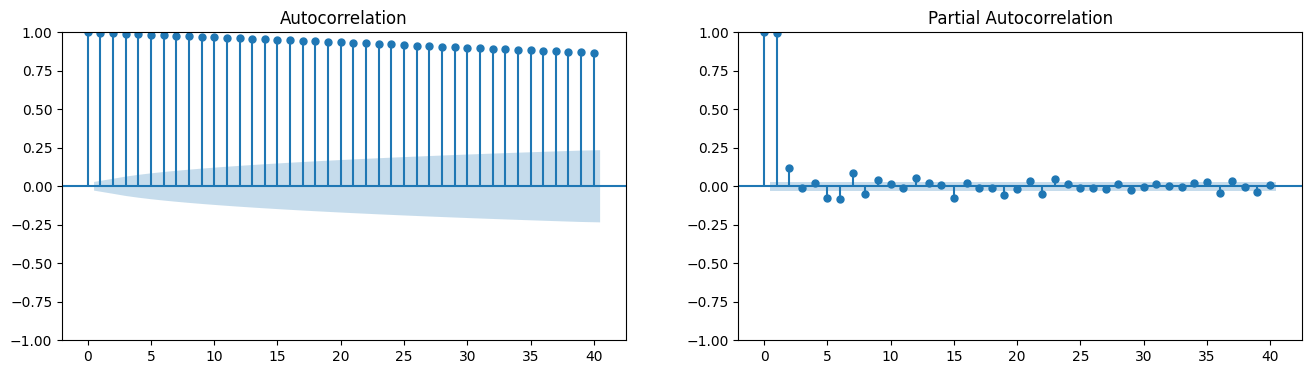

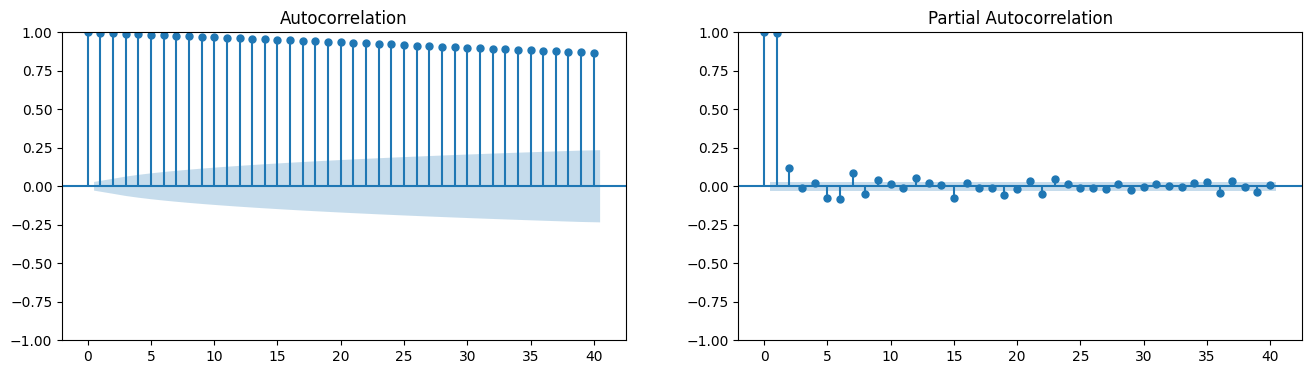

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train['diff_log_close'], ax=ax[0], lags=40)
plot_pacf(train['diff_log_close'], ax=ax[1], lags=40)

In [22]:
df_differenced = train['diff_log_close'].diff().dropna()

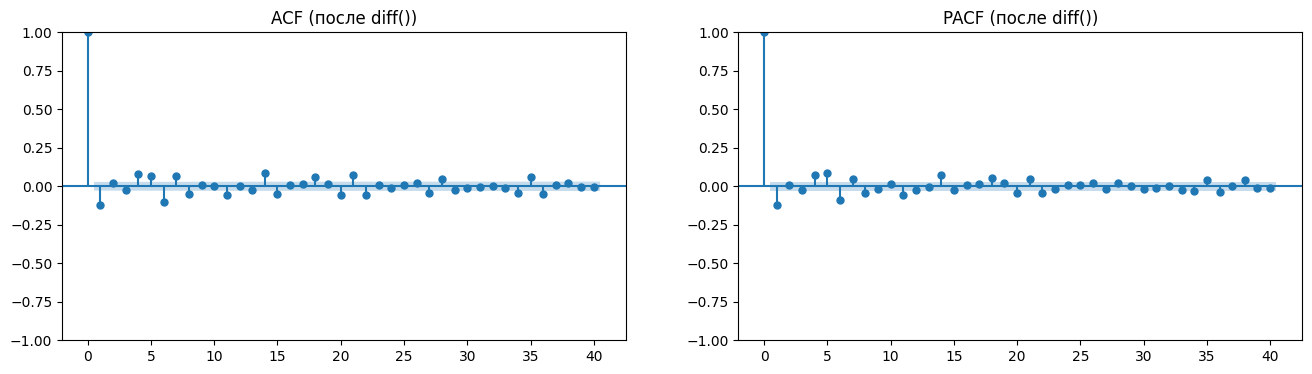

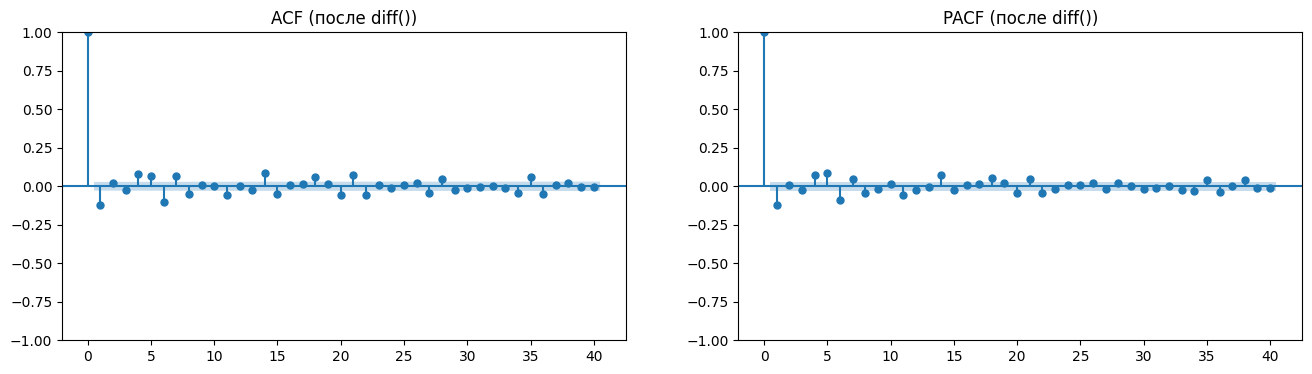

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df_differenced, ax=ax[0], lags=40, title="ACF (после diff())")
plot_pacf(df_differenced, ax=ax[1], lags=40, title="PACF (после diff())")

In [100]:
import pmdarima as pm

In [101]:
model_auto = pm.auto_arima(train['diff_log_close'],
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           d=None,           
                           seasonal=False,  
                           stepwise=True,
                           trace=True)     

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-25628.191, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-25695.360, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-25693.560, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-25630.185, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-25693.648, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-25693.820, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-25691.535, Time=0.92 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-25697.352, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-25695.640, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-25695.813, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-25695.552, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-25693.567, Time=0.63 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.288 seconds
                               SARIMAX Results                  

In [102]:
model = ARIMA(train['diff_log_close'], order=(1, 1, 0))
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         diff_log_close   No. Observations:                 4835
Model:                 ARIMA(1, 1, 0)   Log Likelihood               12850.676
Date:                Wed, 03 Dec 2025   AIC                         -25697.352
Time:                        21:09:48   BIC                         -25684.386
Sample:                    02-12-2005   HQIC                        -25692.800
                         - 05-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1192      0.005    -25.331      0.000      -0.128      -0.110
sigma2         0.0003   3.79e-07    757.466      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          47595731.79
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.16   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                       489.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Mean Squared Error: 0.009425240551881505


Text(0.5, 1.0, 'Сравнение прогноза и реальности (дифференцированные данные)')

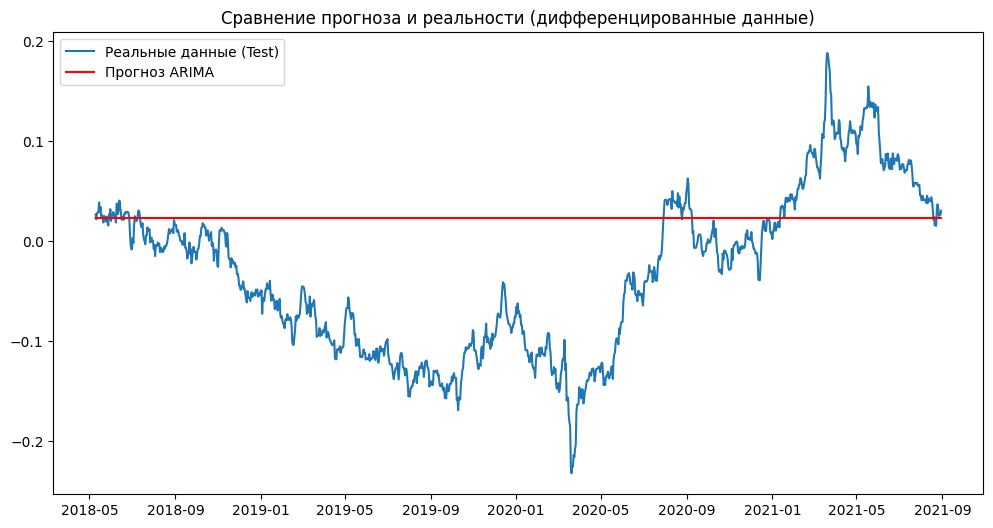

In [103]:
start = len(train)
end = len(train) + len(test) - 1

predictions = model_fit.predict(start=start, end=end, dynamic=False)

predictions.index = test.index

error = mean_squared_error(test['diff_log_close'], predictions)
print(f'Mean Squared Error: {error}')

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['diff_log_close'], label='Реальные данные (Test)')
plt.plot(predictions.index, predictions, color='red', label='Прогноз ARIMA')
plt.legend()
plt.title('Сравнение прогноза и реальности (дифференцированные данные)')

____

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [26]:
df_xgb = df_GBP2EGP_filled_cl[['diff_log_close']].copy()

target_col = 'diff_log_close'

In [27]:
df_xgb['lag_1'] = df_xgb[target_col].shift(1)
df_xgb['lag_7'] = df_xgb[target_col].shift(7)
df_xgb['lag_30'] = df_xgb[target_col].shift(30)

In [28]:
df_xgb['dayofweek'] = df_xgb.index.dayofweek
df_xgb['dayofyear'] = df_xgb.index.dayofyear
df_xgb['quarter'] = df_xgb.index.quarter

In [29]:
df_xgb['rolling_mean_7d'] = df_xgb[target_col].shift(1).rolling(window=7).mean()
df_xgb['rolling_std_30d'] = df_xgb[target_col].shift(1).rolling(window=30).std()

df_xgb.dropna(inplace=True)

In [30]:
X = df_xgb.drop(target_col, axis=1)
y = df_xgb[target_col]

train_size = int(len(X) * 0.8)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [32]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  
    n_estimators=1000,             
    learning_rate=0.01,            
    max_depth=5,                   
    random_state=42
)

xgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              verbose=False)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [33]:
predictions = xgb_model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Root Mean Squared Error (RMSE): 0.0251


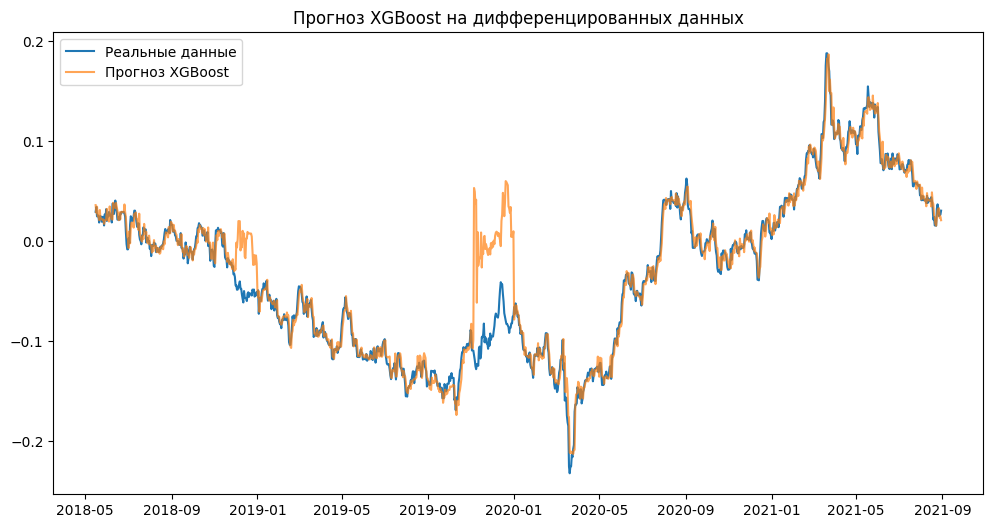

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Реальные данные')
plt.plot(results.index, results['Predicted'], label='Прогноз XGBoost', alpha=0.7)
plt.title('Прогноз XGBoost на дифференцированных данных')
plt.legend()

In [35]:
import lightgbm as lgb

In [ ]:
lgbm_model = lgb.LGBMRegressor(
    objective='regression',  
    metric='rmse',          
    n_estimators=1000,
    learning_rate=0.03,     
    max_depth=6,             
    n_jobs=-1,               
    random_state=42
)

lgbm_model.fit(X_train, y_train,
               eval_set=[(X_test, y_test)],
               eval_metric='rmse')

In [40]:
predictions_lgbm = lgbm_model.predict(X_test)

rmse_lgbm = np.sqrt(mean_squared_error(y_test, predictions_lgbm))
print(f'LightGBM Root Mean Squared Error (RMSE): {rmse_lgbm:.4f}')

LightGBM Root Mean Squared Error (RMSE): 0.0101


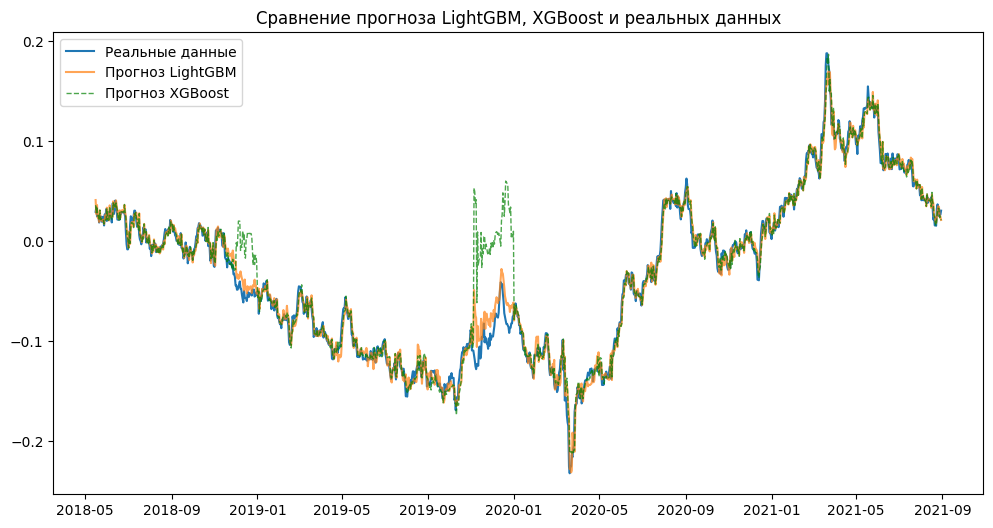

In [46]:
results_lgbm = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_lgbm}, index=y_test.index)

plt.figure(figsize=(12, 6))
plt.plot(results_lgbm.index, results_lgbm['Actual'], label='Реальные данные')
plt.plot(results_lgbm.index, results_lgbm['Predicted'], label='Прогноз LightGBM', alpha=0.7)
plt.plot(results.index, results['Predicted'], label='Прогноз XGBoost', alpha=0.7, color='green', linestyle='--', linewidth=1)
plt.title('Сравнение прогноза LightGBM, XGBoost и реальных данных')
plt.legend()